# IS509 Assignment 4


#### After applying required preprocessing steps, fit specified models to the data.  
    
#### When necessary you can use (%70 train - %30 test) or (%60 train - %20 validation - %20 test) splits for the questions.


## PART 1-Classification
    
**Q1.(50).** Fit Logistic Regression, Gaussian Naive Bayes,  Decision Tree models to your training set. **Perform hyperparameter tuning** and try to figure out the best model. Report the model performances. Which performance metric would you prefer to use for Part I? Why? Comment on your findings.
    
### PART 2
    
**Q2.(15).** Generate k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10. Determine the optimal value of k by looking at the wss graph and silhouette scores.   

**Q3.(15).** Generate DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20. Find the optimal value of k by adjusted rand scores. (While calculating adjusted rand scores, you will need true labels. Please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)   

**Q4.(20).** Plot the clusters for only the optimal k values based on predicted clusters that you obtain Q2 and Q3. Plot the original data based on the true labels. Did you obtain the same optimal k values in Q2 and Q3? Comment on the quality of the clusters that you obtained in Q2 and Q3. Can we predict the true label of the data by using clustering? Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?

**Do not forget to use random_state and seeds for reproducibility.** 

**Preprocessing steps**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import linear_model
from sklearn import metrics 
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv("data.csv")
data.head()
# From the below result, we observe that there is no categorical independent variables (features)
# Only the target variable is categorical (if it were numeric, this would be a regression type problem)

,x0,x1,y
0,281.931378,145.018979,1
1,357.750303,119.483971,1
2,381.598615,146.832723,1
3,377.749439,134.867567,1
4,329.865988,143.835645,0


In [3]:
data.shape

(3000, 3)

In [4]:
# Checking if there is any missing value
data.isna().sum()

x0    0
x1    0
y     0
dtype: int64

In [5]:
data.describe()

,x0,x1,y
count,3000.000000,3000.000000,3000.000000
mean,215.053621,76.322018,2.566667
std,77.709345,43.853373,1.667278
min,75.168939,6.669953,0.000000
25%,171.108588,46.358931,1.000000
50%,200.585346,61.005847,3.000000
75%,261.233440,118.031657,4.000000
max,387.781802,167.586735,5.000000


In [6]:
print('unique values of the target variable y:', data.y.unique())

unique values of the target variable y: [1 0 2 3 4 5]


Text(0.5, 1.0, 'y')

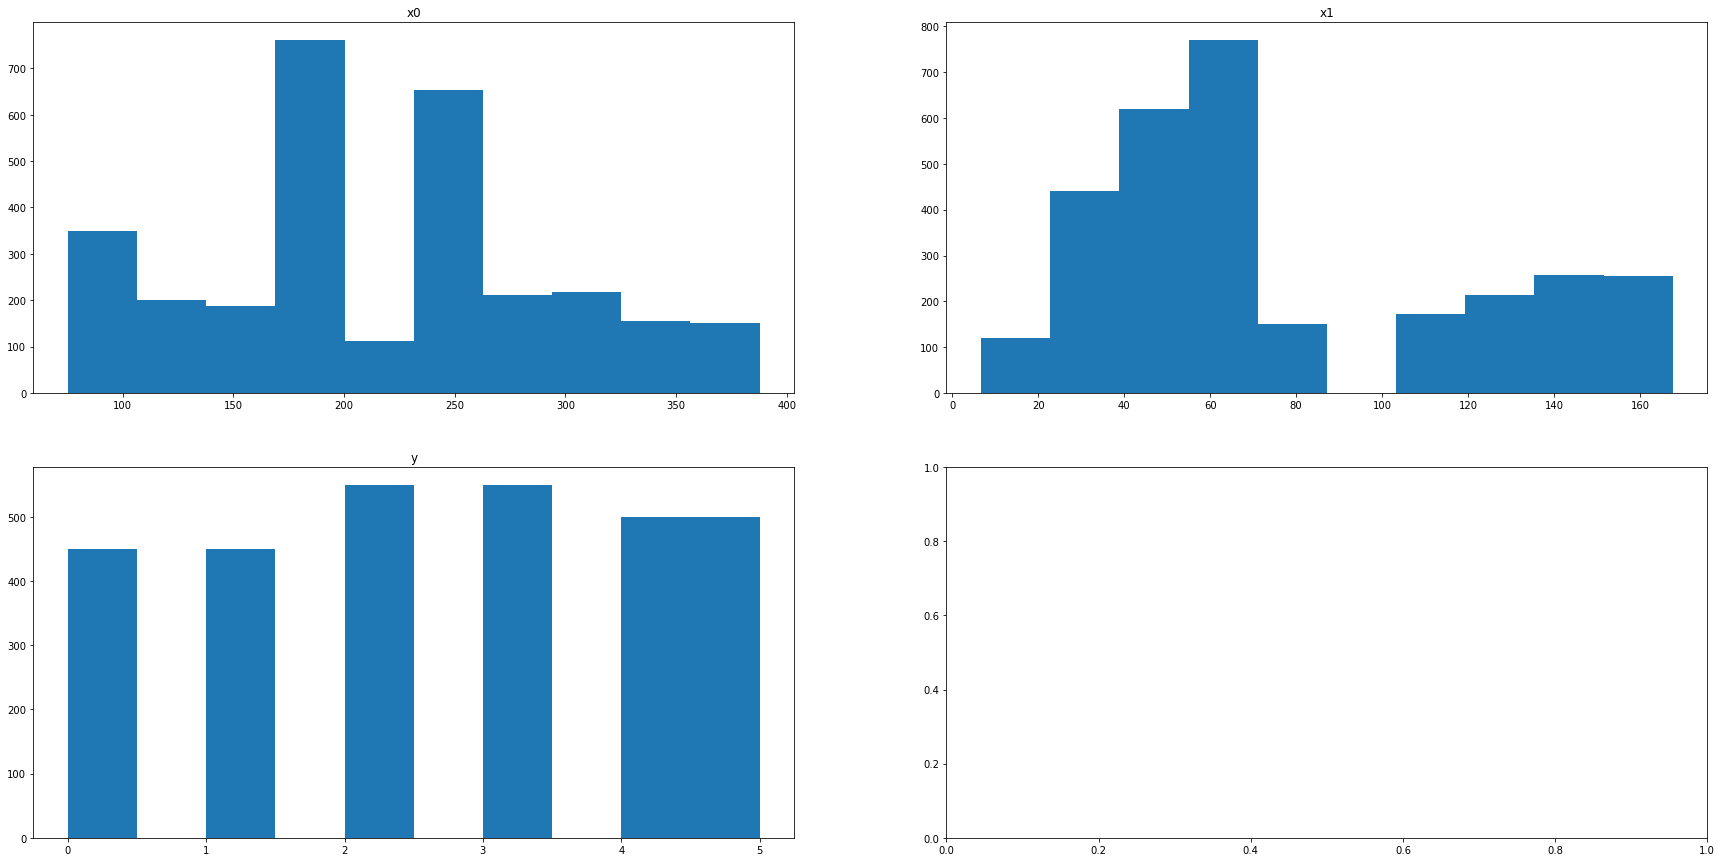

In [7]:
# Taking a look at histograms to see of there is something unusual
rows=2
columns=2
f, axes = plt.subplots(rows,columns, figsize=(30, 15))

axes[0,0].hist(data['x0'])
axes[0,1].hist(data['x1'])
axes[1,0].hist(data['y'])

axes[0,0].set_title('x0')
axes[0,1].set_title('x1')
axes[1,0].set_title('y')

In [8]:
# We check for outliers with 1.5 IQR
for columns in data.columns:
    quantiles=data[columns].quantile(q=[0.25,0.50,0.75]).values
    q1=quantiles[0]
    q2=quantiles[1]
    q3=quantiles[2]
    iqr=q3-q1
    outliers=data[(data[columns] < q1-1.5*iqr ) | (data[columns] >  q3+ 1.5*iqr)][columns]
    print("number of outliers in", columns, ":", (len(outliers)))

number of outliers in x0 : 0
number of outliers in x1 : 0
number of outliers in y : 0


In [9]:
# Train and test split of data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:2],data.y,test_size=0.3,random_state=22)
print('Training set size:', X_train.shape)
print('Test set size:', X_test.shape)

Training set size: (2100, 2)
Test set size: (900, 2)


In [10]:
# X_train.describe()
# X_train.head()
# X_test.head()

In [11]:
# Next, we apply zero mean and unit standard deviation standardization to standardize our training set
# We apply the same standardization that we applied with the training set to the test set as well 
# In other words, we use the mean and the std dev of only the training set while performing these standardizations

scaler = preprocessing.StandardScaler().fit(X_train)

scaled_train = scaler.transform(X_train)
scaled_train = pd.DataFrame(scaled_train, columns=X_train.columns)

scaled_test = scaler.transform(X_test)
scaled_test = pd.DataFrame(scaled_test, columns=X_test.columns)

In [12]:
# scaled_train.head()
# scaled_test.head()

**Part 1 - Classification**

**Question 1**

**Logistic Regression with Hyperparameter Tuning**

In [13]:
modelLR = LogisticRegression()
modelLR.fit(scaled_train, y_train)
y_train_pred_LR = modelLR.predict(scaled_train)
y_test_pred_LR = modelLR.predict(scaled_test)

correctly_classified = 0
number_of_classifications = 0
for r in range (6):
    for c in range (6):
        number_of_classifications += metrics.confusion_matrix(y_test_pred_LR, y_test)[r,c]
        if r ==c:
            correctly_classified += metrics.confusion_matrix(y_test_pred_LR, y_test)[r,c]
            c += 1
    r += 1

print('train accuracy = ', metrics.accuracy_score(y_train_pred_LR, y_train))
print('test accuracy = ', metrics.accuracy_score(y_test_pred_LR, y_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y_test_pred_LR, y_test))
print('correctly classified examples = ', correctly_classified)
print('total number of classified examples = ', number_of_classifications)

train accuracy =  0.741904761904762
test accuracy =  0.7233333333333334
test confusion matrix:
 [[127  12   0   0   0   0]
 [ 22 117   0   0   0   0]
 [  0   0 165   0   0   0]
 [  0   0   0 156   0   0]
 [  0   0   0   0  86 160]
 [  0   0   0   0  55   0]]
correctly classified examples =  651
total number of classified examples =  900


In [14]:
modelLR = LogisticRegression(multi_class='ovr')
modelLR.fit(scaled_train, y_train)
y_train_pred_LR = modelLR.predict(scaled_train)
y_test_pred_LR = modelLR.predict(scaled_test)

correctly_classified = 0
number_of_classifications = 0
for r in range (6):
    for c in range (6):
        number_of_classifications += metrics.confusion_matrix(y_test_pred_LR, y_test)[r,c]
        if r ==c:
            correctly_classified += metrics.confusion_matrix(y_test_pred_LR, y_test)[r,c]
            c += 1
    r += 1

print('train accuracy = ', metrics.accuracy_score(y_train_pred_LR, y_train))
print('test accuracy = ', metrics.accuracy_score(y_test_pred_LR, y_test))
print('test confusion matrix:\n', metrics.confusion_matrix(y_test_pred_LR, y_test))
print('correctly classified examples = ', correctly_classified)
print('total number of classified examples = ', number_of_classifications)

train accuracy =  0.7842857142857143
test accuracy =  0.7755555555555556
test confusion matrix:
 [[121  14   0   0   0   0]
 [ 28 115   0   0   0   0]
 [  0   0 165   0   0   0]
 [  0   0   0 156   0   0]
 [  0   0   0   0 141 160]
 [  0   0   0   0   0   0]]
correctly classified examples =  698
total number of classified examples =  900


**Performance of Logistic Regression**

We fit Logistic Regression models by using the training dataset. 
We tried multi_class='auto' by default and then set multi_class='ovr' that is One-vs-rest. This is a heuristic method for using binary classification algorithms for multi-class classification.

It splits the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

When we apply each model generated by fitting the training set to the test dataset, we obtain a corresponding confusion matrix as shown above. This matrix present us the number of observations that are classified correctly and the number of observations that are misclassified by the generated model for the unseen test observations. The diagonal elements correspond to the examples that are correctly classified. Our aim is to increase the number of examples fall into the diagonal in classification problems. 

Here, we estimated 900 observations that were in our test dataset. From the sum of diagonal values, we observe that One-vs-rest approach provides a higher accuracy than the other as 0.7756 for the test data. 

When we compare the accuracy of the training and the test datasets, we observe that they are close to each other. 

If there were overfitting, the test accuracy would be much lower than the training accuracy. We observe overfitting when the model perfectly fits to the training data so that it is not generalizable enough for the unseen examples. 

In oversimplification, we would observe low accuracy values for both test and training sets because the model would be too simple to explain the complex relationship within the data. 

In this example, there no indication of overfitting or oversimplification. 

The accuracy levels do not seem to be sufficiently high. 

**Gaussian Naive Bayes**

The Naive Bayes model assumes that input features are independent of each other. The reason of this assumption is to decrease the computational complexity of the Bayes Theorem. However, it is commonly used even this assumption does not hold or Bayesian Belief Networks may be used in this case. Below, we check the correlation between x0 and x1 to check if they are correlated or not that is if there is any linear relationship between these 2 input variables. We observe that correlation between them is not considered as high.

In [15]:
data.corr()

,x0,x1,y
x0,1.000000,0.598198,-0.680922
x1,0.598198,1.000000,-0.641279
y,-0.680922,-0.641279,1.000000


In [16]:
modelNB = GaussianNB()
modelNB.fit(scaled_train, y_train)
y_train_pred_NB = modelNB.predict(scaled_train)
y_test_pred_NB = modelNB.predict(scaled_test)

r = 0 
c = 0
correctly_classified = 0
number_of_classifications = 0
for r in range (6):
    for c in range (6):
        number_of_classifications += metrics.confusion_matrix(y_test_pred_NB, y_test)[r,c]
        if r ==c:
            correctly_classified += metrics.confusion_matrix(y_test_pred_NB, y_test)[r,c]
            c += 1
    r += 1
        
print('test confusion matrix:\n', metrics.confusion_matrix(y_test_pred_NB, y_test))
print('train accuracy = ', metrics.accuracy_score(y_train_pred_NB, y_train))
print('test accuracy = ', metrics.accuracy_score(y_test_pred_NB, y_test))
print('correctly classified examples = ', correctly_classified)
print('total number of classified examples = ', number_of_classifications)

test confusion matrix:
 [[128  12   0   0   0   0]
 [ 21 117   0   0   0   0]
 [  0   0 164   0   0   0]
 [  0   0   0 156   0   0]
 [  0   0   1   0 141   0]
 [  0   0   0   0   0 160]]
train accuracy =  0.9642857142857143
test accuracy =  0.9622222222222222
correctly classified examples =  866
total number of classified examples =  900


**Performance of Gaussian Naive Bayes**

We fit a Gaussian Naive Bayes model by using the training dataset. 

Then, we apply this model to the unseen observations in the test dataset and obtain the above confusion matrix. 

We estimated 900 unseen observations from our test dataset and from the diagonal values, we observe that 866 of them are correctly classified. This result gives us the accuracy of test dataset as 866/900 = 0.9622. 

When we compare the accuracy of the training and the test dataset, we observe that they are both high and close to each other. 

If there were overfitting, the test accuracy would be much lower than the training accuracy. We observe overfitting when the model perfectly fit to the training data so that it is not generalizable enough for the unseen examples. 

In oversimplification, we would observe low accuracy values for both test and training sets because the model would be too simple to explain the complex relationship within the data. 

In this example, there no indication of overfitting or oversimplification. 

**Decision Tree with Hyperparameter Tuning**

    gini_test  entropy_test  gini_train  entropy_train
2    0.513333      0.656667    0.540952       0.694762
3    0.656667      0.842222    0.693810       0.852857
4    0.850000      0.938889    0.859524       0.948095
5    0.946667      0.952222    0.949048       0.961905
6    0.960000      0.966667    0.962857       0.973810
7    0.974444      1.000000    0.975714       1.000000
8    1.000000      1.000000    1.000000       1.000000
9    1.000000      1.000000    1.000000       1.000000
10   1.000000      1.000000    1.000000       1.000000
11   1.000000      1.000000    1.000000       1.000000
12   1.000000      1.000000    1.000000       1.000000
13   1.000000      1.000000    1.000000       1.000000
14   1.000000      1.000000    1.000000       1.000000


Text(0.5, 1.0, 'Accuracy of tuned decision tree models for the test and training datasets')

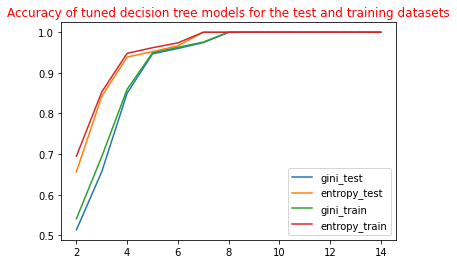

In [17]:
DT_accuracy = pd.DataFrame(columns = ['gini_test', 'entropy_test','gini_train', 'entropy_train'])

for d in range(2,15): # for maximum depth
    modelDT_g = DecisionTreeClassifier(criterion='gini', max_depth=d) #default is also gini
    modelDT_g.fit(scaled_train, y_train)
    y_test_pred_DT_g = modelDT_g.predict(scaled_test)
    y_train_pred_DT_g = modelDT_g.predict(scaled_train)
    modelDT_e = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    modelDT_e.fit(scaled_train, y_train)
    y_test_pred_DT_e = modelDT_e.predict(scaled_test)
    y_train_pred_DT_e = modelDT_e.predict(scaled_train)
    DT_accuracy.loc[d] = (metrics.accuracy_score(y_test_pred_DT_g, y_test), metrics.accuracy_score(y_test_pred_DT_e, y_test), metrics.accuracy_score(y_train_pred_DT_g, y_train), metrics.accuracy_score(y_train_pred_DT_e, y_train))
print(DT_accuracy)
DT_accuracy.plot()
plt.title('Accuracy of tuned decision tree models for the test and training datasets', c='r')

**Performance of Decision Tree**

In this case, we fit Decision Tree models with different parameters by using the training dataset. 


Then, we apply these models to the unseen observations in the test and training datasets and obtain the above accuracy results. 
The accuracy values are computed as the percentage of correctly classified test and training observations. 


Decision Tree logic tries to classify data based on Information Gain to obtain a classification as pure as possible.

One splitting criterion is based on a purity measure called the Entropy. Entropy is a measure of uncertainty associated with a random number. Higher entropy means higher uncertainty and lower entropy means lower entropy. Information Gain measures the expected reduction in the Entropy of the target variable y by knowing the input feature x. Gini index is another purity measure. 

The best model is obtained by using the Entropy as criterion and 7 as the number of maximum tree depth. This model has a accuracy of 100% for both the test set and the training dataset. 

For all trials, the accuracy of the training and the test dataset close to each other so there is no indication of overfitting or oversimplification. 

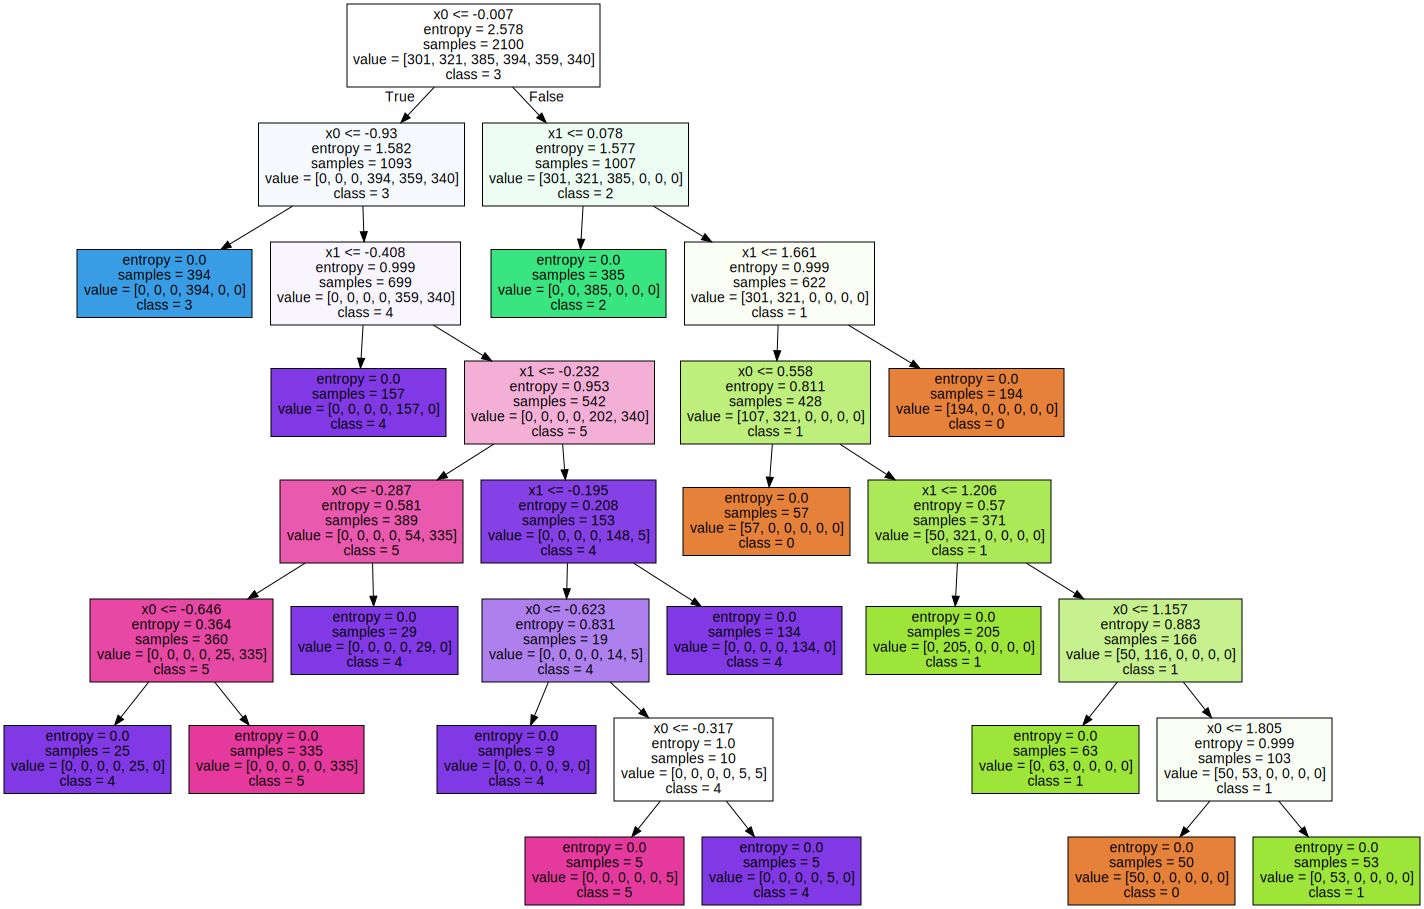

In [18]:
# conda install python-graphviz
import graphviz
modelDT_e = DecisionTreeClassifier(criterion='entropy', max_depth=7)
modelDT_e.fit(scaled_train, y_train)
modelDT_e_data = tree.export_graphviz(modelDT_e, out_file=None, filled=True, feature_names=['x0','x1'], class_names=['0','1','2','3','4','5'])
graph = graphviz.Source(modelDT_e_data)
graph

**Performance Metric Selection for Part 1**

In this part, we have a classification problem and the number of classes for the target variable 'y' is 6 which are [0, 1, 2, 3, 4, 5]. From the context, there is not such a case like misclassification of one particular class is more important/costly than the misclassification of others. Hence, every misclassification have equal weights. In addition, the target variable is not binary. If it were binary, we could measure another metrics like precision or recall. For our dataset, it seems appropriate to use accuracy as the performance metric which is the total number of correctly classified observations over the total number of classifications performed. 

Among the classification models that we applied, the best performance is obtained with Decision Tree. 

**Part 2 - Clustering**

Clustering is a task type under the category of Unsupervised Learning. 

The aim of Clustering is to group observations in a given set based on a similarity metric like distance-based or density-based similarity. We evaluate the performance of the model based on a quality measure.

However, we do not have the information of how many groups are there and the target values of any observations. 
Hence, instead of the test-train split approach that we can apply in Regression and Classification type problems, we employ whole data for model induction phase in Clustering.

In [19]:
# We apply zero mean and unit standard deviation standardization to standardize our dataset as a whole
standardscaler = StandardScaler()
scaled_full = standardscaler.fit_transform(data.iloc[:,:2])
scaled_full = pd.DataFrame(scaled_full, columns=['x0','x1'])
scaled_full.head()

# data.describe()

,x0,x1
0,0.860758,1.566776
1,1.836593,0.984397
2,2.143536,1.608142
3,2.093995,1.335252
4,1.477705,1.539788


In [20]:
data['y']

0       1
1       1
2       1
3       1
4       0
       ..
2995    4
2996    4
2997    5
2998    4
2999    4
Name: y, Length: 3000, dtype: int64

**Question 2 - k-means**

**Generate k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10. Determine the optimal value of k by looking at the wss graph and silhouette scores.**

**Within Sum of Squares(WSS)**

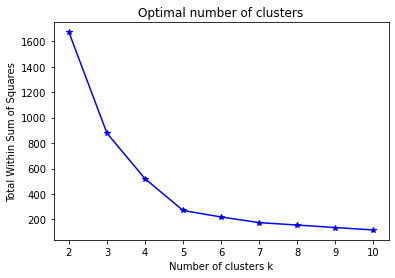

In [21]:
wss = []
count = range(2,11)
for k in count:
    kmeans = KMeans(n_clusters=k, random_state=22)
    kmeans = kmeans.fit(scaled_full)
    wss.append(kmeans.inertia_)
plt.plot(count, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()


**Comments on WSS Graph**

It is generally considered as the measure of compactness. It calculates the Squared Error for each point as the square of the distance of the point from its predicted cluster center. Then, take the summation of these Squared Errors for all points. Different distance metrics such as Euclidean or Manhatten distance can be used. 

Based on the WSS graph, the optimal k value seems to be 5 since the bend in the knee occurs at this point.
Until k = 5, the value of sum of squared values continue to decrease considerably as k increases. 

**Average Silhouette Score**

n_clusters = 2 The average silhouette_score is : 0.6731
n_clusters = 3 The average silhouette_score is : 0.6409
n_clusters = 4 The average silhouette_score is : 0.7129
n_clusters = 5 The average silhouette_score is : 0.6668
n_clusters = 6 The average silhouette_score is : 0.6458
n_clusters = 7 The average silhouette_score is : 0.6567
n_clusters = 8 The average silhouette_score is : 0.5667
n_clusters = 9 The average silhouette_score is : 0.6748
n_clusters = 10 The average silhouette_score is : 0.5849


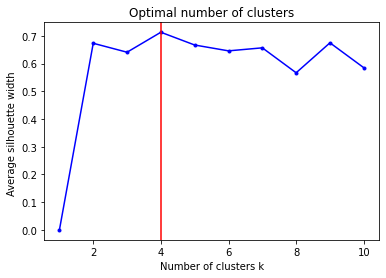

In [22]:
sil_avg = [0]
count = range(2,11)
for k in count:
    kmeans = KMeans(n_clusters=k, random_state=22)
    cluster_labels=kmeans.fit_predict(scaled_full)
    silhouette_avg = silhouette_score(scaled_full, cluster_labels)
    sil_avg.append(silhouette_avg)
    print("n_clusters =", k, "The average silhouette_score is : %.4f" % silhouette_avg)

plt.plot(range(1,len(sil_avg)+1), sil_avg, "b.-")
plt.xlabel("Number of clusters k")
plt.ylabel("Average silhouette width ")
plt.title("Optimal number of clusters")
plt.axvline( color='r', x=sil_avg.index(max(sil_avg))+1 )
plt.show()    

**Comments on Average Silhouette Score**

Silhouette Score measures how similar a point is to its own cluster compared with the other clusters. Hence, we want such a score to be as high as possible. 

Based on the Average Silhouette Score, the optimal value of k is 4. 

With the WSS Graph, we consider k = 5 as the optimal value. However, Average Silhouette Score indicates the optimal value as k = 4. 

Hence, it may be beneficial to apply another clustering algorithm to make a final decision. 

**Question 3 - DBSCAN**

Generate DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20. Find the optimal value of k by adjusted rand scores.

In [23]:
cluster_hyperparameter = pd.DataFrame(columns = [])
for e in range(1,26):
    for s in range(5,21,5):
        clustering = DBSCAN(eps=e/10, min_samples=s) 
        clusters = clustering.fit_predict(scaled_full)
        cluster_hyperparameter.loc[e/10, s] = adjusted_rand_score(data['y'], clusters)
                
print(cluster_hyperparameter)

# Printing the model with the best tuned parameters is performed in Question 4

# cluster_results = pd.DataFrame(columns = ['true class', 'predicted class'])
# for i in range(3000):
# cluster_results.loc[i]=(data['y'].loc[i], clusters[i])
# print(cluster_results)


           5         10        15        20
0.1  0.996536  0.994772  0.993899  0.992143
0.2  0.824046  0.824046  0.823614  0.823614
0.3  0.709095  0.709095  0.709095  0.709095
0.4  0.254466  0.254466  0.254466  0.254466
0.5  0.254466  0.254466  0.254466  0.254466
0.6  0.254466  0.254466  0.254466  0.254466
0.7  0.254466  0.254466  0.254466  0.254466
0.8  0.254466  0.254466  0.254466  0.254466
0.9  0.254466  0.254466  0.254466  0.254466
1.0  0.254466  0.254466  0.254466  0.254466
1.1  0.254466  0.254466  0.254466  0.254466
1.2  0.254466  0.254466  0.254466  0.254466
1.3  0.000000  0.000000  0.000000  0.000000
1.4  0.000000  0.000000  0.000000  0.000000
1.5  0.000000  0.000000  0.000000  0.000000
1.6  0.000000  0.000000  0.000000  0.000000
1.7  0.000000  0.000000  0.000000  0.000000
1.8  0.000000  0.000000  0.000000  0.000000
1.9  0.000000  0.000000  0.000000  0.000000
2.0  0.000000  0.000000  0.000000  0.000000
2.1  0.000000  0.000000  0.000000  0.000000
2.2  0.000000  0.000000  0.00000

**Comments on DBSCAN**

Epsilon is the radius of the circles that the algorithm draws. 
As we increase epsilon, the model may include more points in a specific cluster since the radius is longer. 
We should be careful because some points that are not very similar to the other points may be included in the same cluster as well and the accuracy may decrease. 

Min samples is the number of points that we want to have in the circles drawn by the model. Similar to the case of increasing epsilon value, the accuracy may decrease while increasing the minimum number of samples. The reason is that, the model may consider and include more points in a specific cluster, even if the points are not quite density-connected. 

When we try different parameters for DBSCAN models, we observe that the maximum accuracy of 0.9965 is achieved with epsilon = 0.1 and minimum number of sample points = 5. 


**Question 4**

**Plot the clusters for only the optimal k values based on predicted clusters that you obtain Q2 and Q3.**

In Question 2, we observed that the optimal k values may be 4 or 5.

Text(0, 0.5, 'x1')

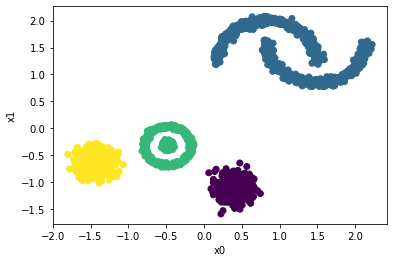

In [24]:
kmeans = KMeans(n_clusters=4, random_state=22)
df=scaled_full[["x0","x1"]].copy()
df["clusters"]=kmeans.fit_predict(scaled_full)
plt.scatter(df["x0"], df["x1"],c=df.clusters)      
plt.xlabel("x0")
plt.ylabel("x1")

Text(0, 0.5, 'x1')

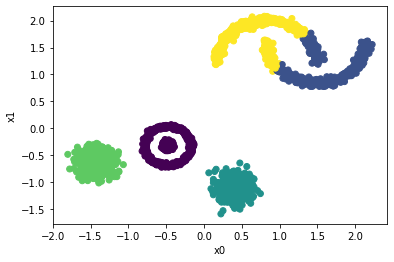

In [25]:
kmeans = KMeans(n_clusters=5, random_state=22)
df=scaled_full[["x0","x1"]].copy()
df["clusters"]=kmeans.fit_predict(scaled_full)
plt.scatter(df["x0"], df["x1"],c=df.clusters)      
plt.xlabel("x0")
plt.ylabel("x1")

In Question 3, based on DBSCAN, the optimal k value is k = 6 with e = 0.1 and min_sample = 5.

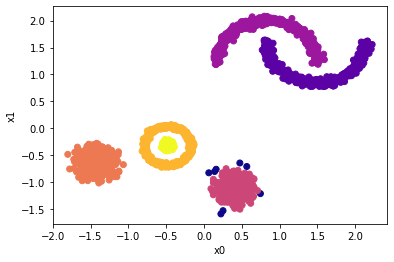

3000
Estimated number of optimal clusters: 6
Estimated number of noise points: 8
Adjusted rand score: 0.9965358935695121


In [26]:
clustering_optimal = DBSCAN(eps=0.1, min_samples=5) 
clusters_optimal = clustering_optimal.fit_predict(scaled_full)
plt.scatter(scaled_full['x0'], scaled_full['x1'], c = clusters_optimal, cmap= "plasma")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show() 
print(len(clusters_optimal))
number_of_noise = np.sum(np.array(clusters_optimal) == -1, axis=0)
clusters_without_noise = np.delete(clusters_optimal, np.where(clusters_optimal == -1))
number_of_optimal_clusters = len(np.unique(clusters_without_noise))
print('Estimated number of optimal clusters: %d' % number_of_optimal_clusters)
print('Estimated number of noise points: %d' % number_of_noise) 
print('Adjusted rand score:', adjusted_rand_score(data['y'], clusters_optimal))


**Plot the original data based on the true labels.**

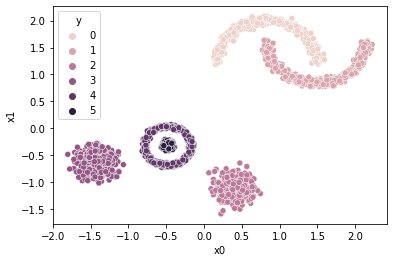

In [27]:
data2 = data
data2.head()
data2.drop('x0', inplace=True, axis=1)
data2.drop('x1', inplace=True, axis=1)
scaled_full_with_target = scaled_full.join(data2)
scaled_full_with_target.head()
ax = sns.scatterplot(x='x0', hue='y', y='x1', data=scaled_full_with_target)


**Did you obtain the same optimal k values in Q2 and Q3? Comment on the quality of the clusters that you obtained in Q2 and Q3.** 

No, we obtained different k values in Question 2 and 3. The reason is that, the K-means algorithm and the DBSCAN algorithm have different logic behind them. 

The quality of the clusters obtained by the DBSCAN much higher than the K-means algorithm.

**Can we predict the true label of the data by using clustering?** 

Based on the results we obtained, yes, we can predict true labels for our observations by using clustering with the DBSCAN algorithm.

**Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?**

To cluster our dataset, the DBSCAN model presents a better result than the K-means model. 
In fact, the DBSCAN model correctly perform clustering when we compare the true classes of observations with an adjusted round score equals to 0.99654. It finds 8 observations as noise (outliers). 

K-means algorithm is more sensitive to outliers than the DBSCAN algorithm. 
We need to explicitly specify the number of clusters that will be tried by the model. 
If it starts with different centroids, the results may be different. 
It is not suitable to identify clusters with non-convex shapes and nested round shapes. We observed this situation in our dataset as well. Since the data has a nested round part and a non-convex portion, K-means model could not distinguish these clusters correctly. As an example, even if we increase the number of cluster from 4 to 5, it still can not correctly cluster these portions.

The DBSCAN defines a cluster as the maximum set of density-connected points. It is powerful to identify arbitrary shapes and also noise observations. In our problem, it successfully partitions our dataset including a nested round shape and also a non-convex portion. 